In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import missingno as msno 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

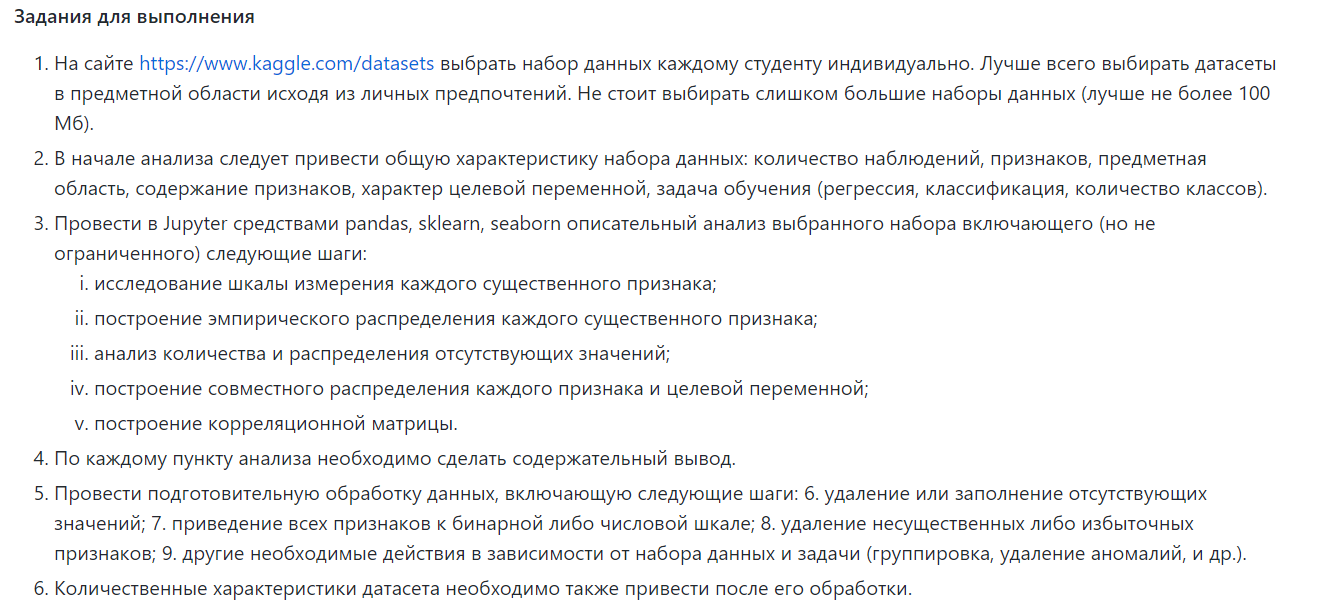

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
df = pd.read_csv('flats_moscow.csv',)
df.head(5)

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [ ]:
"""
price: цена квартиры в $1000 / the price of a flat in 1000$;
totsp: общая площадь квартиры, кв.м. / total square of a flat, m2;
livesp: жилая площадь квартиры, кв.м. / living square of a flat, m2;
kitsp: площадь кухни, кв.м. / kitchen square, m2;
dist: расстояние от центра в км. / distance to the city center, km;
metrdist: расстояние до метро в минутах / distance to the nearest metro station, min;
walk: 1 – пешком от метро, 0 – на транспорте / 1 - walk to metro, 0 - using transport;
brick: 1 – кирпичный, монолит ж/б, 0 – другой / 1 - brick, monolithic house, 0 - anothers;
floor: 1 – этаж кроме первого и последнего, 0 – иначе / 0 - the first or the last floor, 1 - anothers;
code: число от 1 до 8, обозначающее район города / number from 1 to 8 of the city area:
    1. Север, около Калужско-Рижской линии метро / North of the city, around Kaluzhsko-Rizhskaya metro line;
    2. Север, около Серпуховско-Тимирязевской линии метро / North of the city, around Serpukhovsko-Timiryazevskaya metro line;
    3. Северо-запад, около Замоскворецкой линиии метро / North-West, around Zamoskvoretskaya metro line;
    4. Северо-запад, около Таганско-Краснопресненской линиии метро / North-West, around Tagansko-Krasnopresnenskaya metro line;
    5. Юго-восток, около Люблинской линиии метро / South-East, around Lyublinskaya metro line;
    6. Юго-восток, около Таганско-Краснопресненской линиии метро / South-East, around Tagansko-Krasnopresnenskaya metro line;
    7. Восток, около Калининской линиии метро / East, around Kalininskaya metro line;
    8. Восток, около Арбатско-Покровской линиии метро / East, around Arbatsko-Pokrovskaya metro line.
    
"""

'\nprice: цена квартиры в $1000 / the price of a flat in 1000$;\ntotsp: общая площадь квартиры, кв.м. / total square of a flat, m2;\nlivesp: жилая площадь квартиры, кв.м. / living square of a flat, m2;\nkitsp: площадь кухни, кв.м. / kitchen square, m2;\ndist: расстояние от центра в км. / distance to the city center, km;\nmetrdist: расстояние до метро в минутах / distance to the nearest metro station, min;\nwalk: 1 – пешком от метро, 0 – на транспорте / 1 - walk to metro, 0 - using transport;\nbrick: 1 – кирпичный, монолит ж/б, 0 – другой / 1 - brick, monolithic house, 0 - anothers;\nfloor: 1 – этаж кроме первого и последнего, 0 – иначе / 0 - the first or the last floor, 1 - anothers;\ncode: число от 1 до 8, обозначающее район города / number from 1 to 8 of the city area:\n    1. Север, около Калужско-Рижской линии метро / North of the city, around Kaluzhsko-Rizhskaya metro line;\n    2. Север, около Серпуховско-Тимирязевской линии метро / North of the city, around Serpukhovsko-Timiryaz

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2040 non-null   int64  
 1   totsp     2040 non-null   int64  
 2   livesp    2040 non-null   int64  
 3   kitsp     2040 non-null   float64
 4   dist      2040 non-null   float64
 5   metrdist  2040 non-null   int64  
 6   walk      2040 non-null   int64  
 7   brick     2040 non-null   int64  
 8   floor     2040 non-null   int64  
 9   code      2040 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 159.5 KB


In [ ]:
print("-"*30)
print("Missing values of each column")
print("-"*30)
print(df.isna().sum())
print("-"*30)

------------------------------
Missing values of each column
------------------------------
price       0
totsp       0
livesp      0
kitsp       0
dist        0
metrdist    0
walk        0
brick       0
floor       0
code        0
dtype: int64
------------------------------


In [ ]:
df.describe()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686,4.322059
std,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918,2.183289
min,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


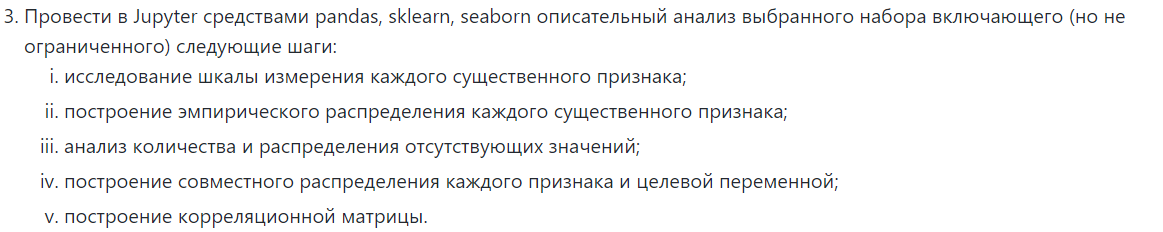

In [ ]:
df.columns[0]

'price'

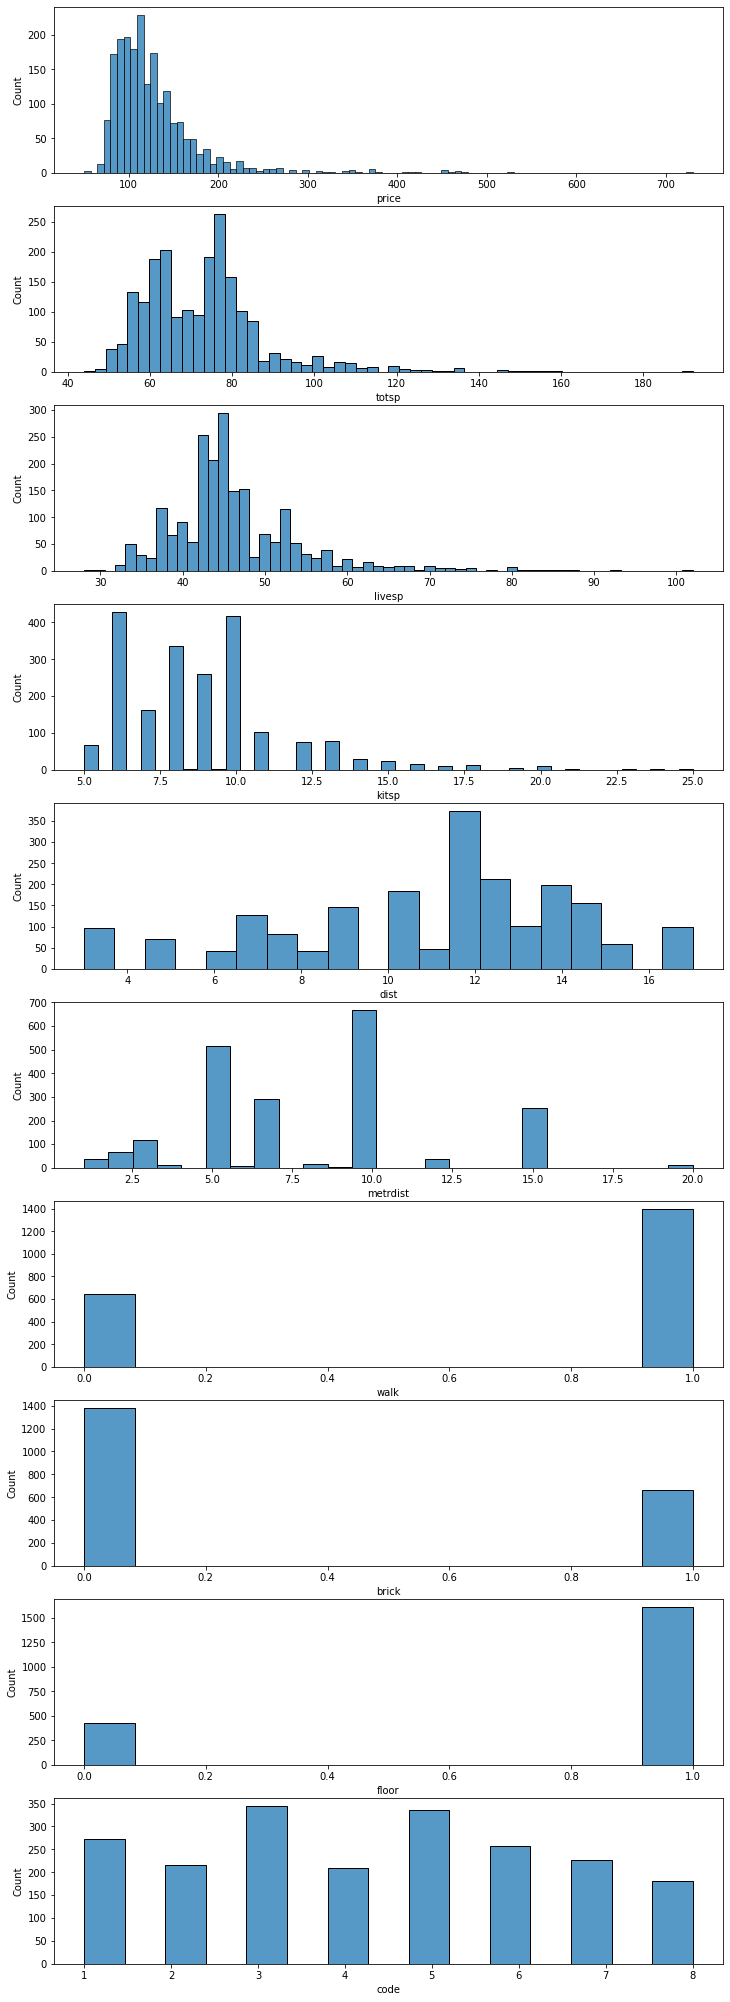

In [ ]:
fig, axes = plt.subplots(10, 1, figsize=(12, 36))

for i, column in enumerate(df.columns):
    sns.histplot(data=df[column], ax=axes[i])


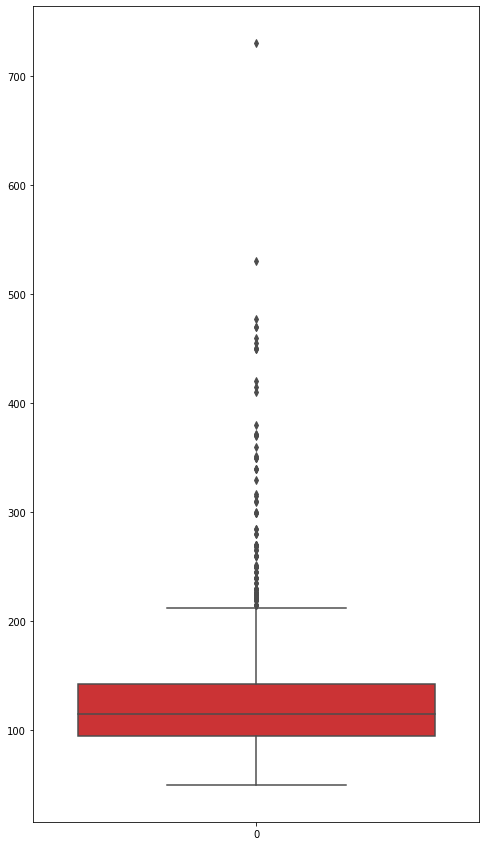

In [ ]:
plt.figure(figsize=(8, 15))
sns.boxplot(data=df.price, palette='Set1');

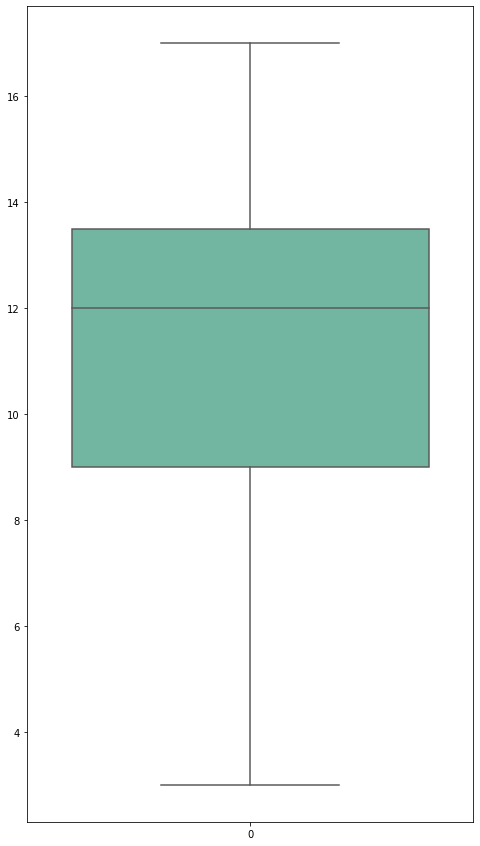

In [ ]:
plt.figure(figsize=(8, 15))
sns.boxplot(data=df.dist, palette='Set2');

### Удаляем выбросы у price:

In [ ]:
df = df[df.price < 320]

In [ ]:
df.price

0        81
1        75
2       128
3        95
5       137
       ... 
2035    110
2036     95
2037     95
2038    129
2039    103
Name: price, Length: 2012, dtype: int64

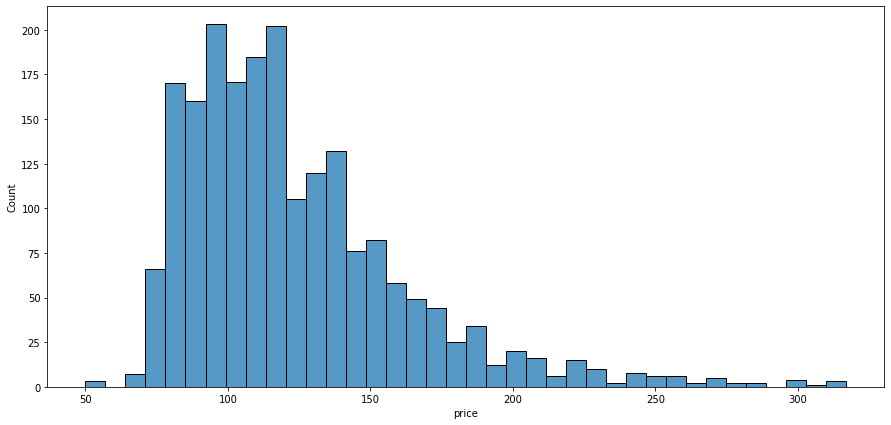

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df.price)

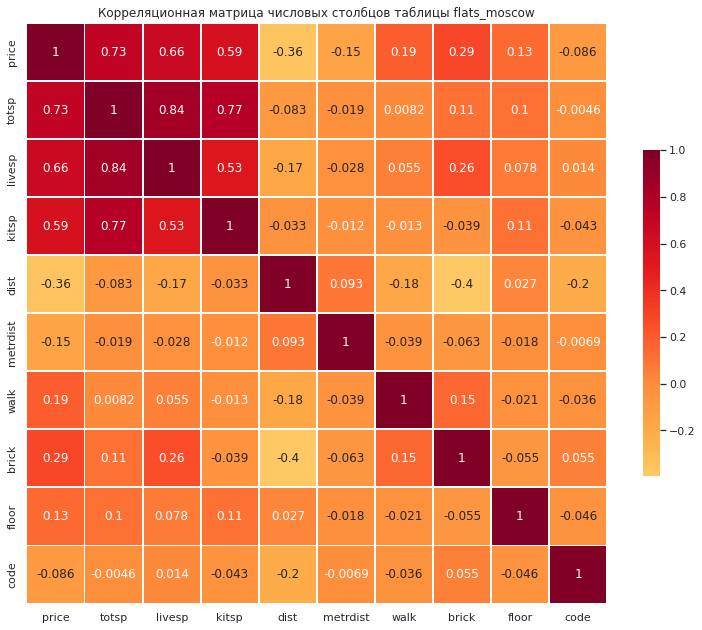

In [ ]:
sns.set_theme(style="white")

corr = df.corr()

fig, ax = plt.subplots(figsize=(13, 12))

sns.heatmap(corr, cmap='YlOrRd', center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})\
            .set_title('Корреляционная матрица числовых столбцов таблицы flats_moscow');
# sns.pairplot(df);

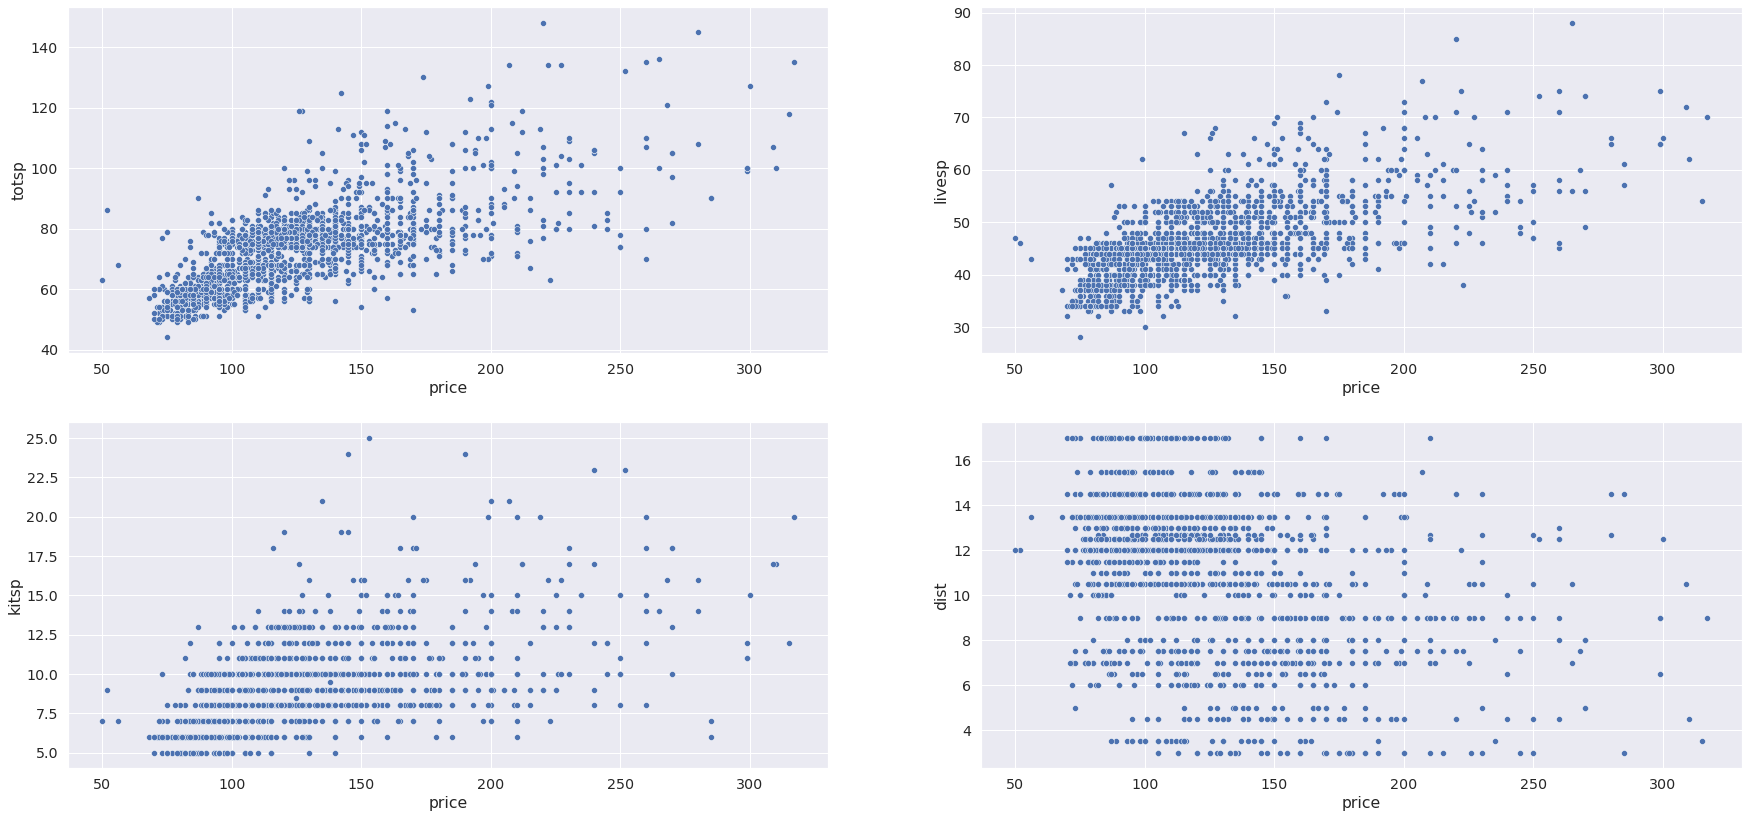

In [ ]:
fig, ax = plt.subplots(figsize=(30, 14))
sns.set(font_scale=1.3)

plt.subplot(2, 2, 1)
sns.scatterplot(
    x='price', 
    y='totsp', 
    data=df)

plt.subplot(2, 2, 2)
sns.scatterplot(
    x='price', 
    y='livesp', 
    data=df)

plt.subplot(2, 2, 3)
sns.scatterplot(
    x='price', 
    y='kitsp', 
    data=df)

plt.subplot(2, 2, 4)
sns.scatterplot(
    x='price', 
    y='dist', 
    data=df)


In [ ]:
df.describe()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,123.537773,72.366799,45.947316,8.801690,11.057157,8.143638,0.685388,0.319085,0.788270,4.332505
std,38.663231,13.628357,7.053621,2.657881,3.365135,3.820272,0.464477,0.466238,0.408636,2.187000
min,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,95.000000,61.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,115.000000,73.000000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,140.000000,79.000000,49.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,317.000000,148.000000,88.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


### Построим модель классификации, будет предсказывать район(code):

In [ ]:
target = "code"
Y = df[target]
X = df.drop(target, axis=1)

# Что предсказываем

In [ ]:
df_differences = pd.DataFrame(columns=['Тип модели классификации', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score', 'Время обучения'])

## Сплитим нашу выборку 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
# Определяем методы
learning_models = {
    "LogisticRegression": LogisticRegression(),
    "Метод опорных векторов с линейным ядром (SVC)": svm.SVC(kernel='linear', probability=True),
    "Метод линейного дискриминантного анализа": LinearDiscriminantAnalysis(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Многослойный перцептрон (MLP)": MLPClassifier(max_iter=300) 
}

# Построим график ROC-кривой
plt.figure(figsize=(11.5, 7), dpi=100)

y_test_predict = dict()
i = 0
for name, model in learning_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    t = time.time() - start_time
                 
    y_test_predict[name] = model.predict(x_test)
    df_differences.loc[i] = [name,
                         accuracy_score(y_test, model.predict(x_test)),
                         precision_score(y_test, model.predict(x_test), average='macro'),
                         recall_score(y_test, model.predict(x_test), average='macro'),
                         f1_score(y_test, model.predict(x_test), average='macro'),t]
    
    i += 1

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1150x700 with 0 Axes>

**Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;**

In [ ]:
df_differences

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score,Время обучения
0,LogisticRegression,0.349876,0.311765,0.323549,0.293612,0.488562
1,Метод опорных векторов с линейным ядром (SVC),0.372208,0.327267,0.337429,0.318857,39.518582
2,Метод линейного дискриминантного анализа,0.354839,0.317610,0.323485,0.305870,0.032884
3,KNeighborsClassifier,0.332506,0.287259,0.308867,0.291423,0.014043
4,Многослойный перцептрон (MLP),0.320099,0.337215,0.291972,0.234013,0.795130


### Множественная модель регрессии:

In [ ]:
X = df[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'walk', 'brick', 'floor', 'code']]
y = df.price

In [ ]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

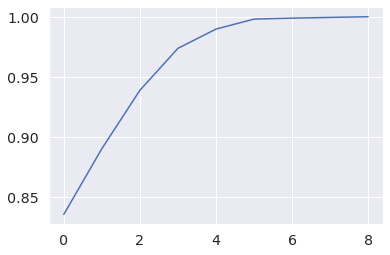

In [ ]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=X_train.shape[1])
X_train_scaled = X_train
pca_test.fit(X_train_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.show()

In [ ]:
def best_params(models_names):
    """models_names = ['name1', 'name2', ...]
    names from LinearRegression, RandomForestRegressor, KNeighborsRegressor, SVR only"""

    d = {}

    for model_name in models_names:
        if model_name == 'LinearRegression':
            lin_reg_parameters = {"fit_intercept": [True, False], 'normalize': [True, False]}
            lin_reg_search = GridSearchCV(LinearRegression(), lin_reg_parameters, cv=5)
            lin_reg_search.fit(X_train, y_train)
            d['LinearRegression'] = lin_reg_search.best_params_
            global lin_reg_search_fitted
            lin_reg_search_fitted = lin_reg_search

        elif model_name == 'RandomForestRegressor':
            rf_reg_parameters = {'n_estimators': range(1, 200), 'max_depth': range(1, 30), 'min_samples_split': range(2, 30), 'min_samples_leaf': range(1, 30)}
            rf_reg_search = RandomizedSearchCV(RandomForestRegressor(), rf_reg_parameters, cv=5, n_jobs=-1, random_state=0)
            rf_reg_search.fit(X_train, y_train)
            d['RandomForestRegressor'] = rf_reg_search.best_params_
            global rf_reg_search_fitted
            rf_reg_search_fitted = rf_reg_search

        elif model_name == 'KNeighborsRegressor':
            kn_reg_parameters = {'n_neighbors': range(3, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': range(1, 40)}
            kn_reg_search = GridSearchCV(KNeighborsRegressor(), kn_reg_parameters, cv=5)
            kn_reg_search.fit(X_test, y_test)            
            d['KNeighborsRegressor'] = kn_reg_search.best_params_
            global kn_reg_search_fitted
            kn_reg_search_fitted = kn_reg_search

        elif model_name == 'SVR':
            svr_reg_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
            svr_reg_search = GridSearchCV(SVR(), svr_reg_parameters, cv=5, n_jobs=-1)
            svr_reg_search.fit(X, y)
            d['SVR'] = svr_reg_search.best_params_
            global svr_reg_search_fitted
            svr_reg_search_fitted = svr_reg_search

    return d

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
best_params(['LinearRegression', 'RandomForestRegressor', 'KNeighborsRegressor', 'SVR'])

{'LinearRegression': {'fit_intercept': True, 'normalize': False},
 'RandomForestRegressor': {'n_estimators': 65,
  'min_samples_split': 13,
  'min_samples_leaf': 6,
  'max_depth': 10},
 'KNeighborsRegressor': {'algorithm': 'brute',
  'leaf_size': 1,
  'n_neighbors': 9,
  'weights': 'distance'},
 'SVR': {'kernel': 'linear'}}

Best_regression_model:  RandomForestRegressor 
            LinearRegression  RandomForestRegressor  KNeighborsRegressor  \
r2_score:           0.67222                0.72438             0.647593   

                SVR  
r2_score:  0.666399  


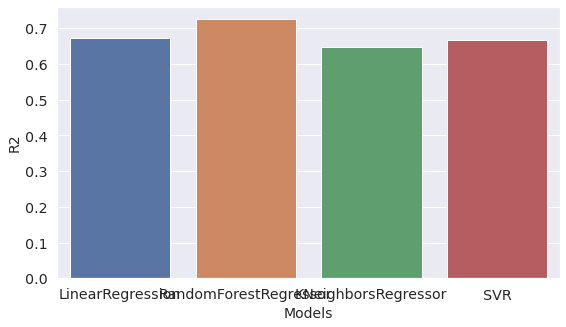

In [ ]:
def best_model(X_train, y_train, X_test, y_test):
    import re
    models = [LinearRegression(fit_intercept=True, normalize=True, n_jobs=-1),
              RandomForestRegressor(n_estimators=65, min_samples_split=13, min_samples_leaf=6, max_depth=10, n_jobs=-1, random_state=0),
              KNeighborsRegressor(algorithm='auto', leaf_size=21, n_neighbors=5, weights='distance', n_jobs=-1),
              SVR(kernel='linear')]
    d = {}
    for model in models:
        model.fit(X_train, y_train)
        model_name = re.match(r'\w+', str(model)).group()
        d[model_name] = r2_score(y_test, model.predict(X_test))
    mdf = pd.DataFrame(d, index=['r2_score:'])
    
    plt.figure(figsize=(9,5))
    bp = sns.barplot(x=mdf.columns, y=mdf.values.flatten())
    bp.set_xlabel("Models", fontsize=14)
    bp.set_ylabel("R2", fontsize=14)

    best_regression_model = mdf.idxmax(axis=1)[0]
    return ('Best_regression_model: ', best_regression_model, '\n', mdf)
    
print(*best_model(X_train, y_train, X_test, y_test))